In [55]:
from src.output_parser import *
import pandas as pd
import glob,os

# From a set of parameters

In [36]:
structure = 'KAXQIL_clean_coremof-2019'
molecule_name ='N2'

In [45]:
df_index = pd.read_csv('data/simulations/index.csv')

In [46]:
# Select only the simulations corresponding to the targeted conditions
df_sim = df_index[(df_index["structure"]==structure)&\
        (df_index["molecule_name"]==molecule_name)]
df_sim

,FF,molecule_name,npoints,pressure,simkey,structure,temperature,unit_cells
10,GenericMOFs,N2,5.0,10.0,869a57d7da417c471bb350fea963,KAXQIL_clean_coremof-2019,298.15,"[5, 3, 2]"
11,GenericMOFs,N2,5.0,250007.5,ddd0c10de958f1e9191ebc414852,KAXQIL_clean_coremof-2019,298.15,"[5, 3, 2]"
12,GenericMOFs,N2,5.0,500005.0,f93ffeb1a8c676563ccea514d875,KAXQIL_clean_coremof-2019,298.15,"[5, 3, 2]"
13,GenericMOFs,N2,5.0,750002.5,83517caf454438a172a31be6e1da,KAXQIL_clean_coremof-2019,298.15,"[5, 3, 2]"
14,GenericMOFs,N2,5.0,1000000.0,bf94d5bb572b84b413f957c0ed5f,KAXQIL_clean_coremof-2019,298.15,"[5, 3, 2]"


In [50]:
# get the list of output files
list_files  = [glob.glob(f"data/simulations/{simkey}/Output/System_0/*") for simkey in df_sim['simkey']]
list_files = sum(list_files, [])
list_files

['data/simulations/869a57d7da417c471bb350fea963/Output/System_0/output_KAXQIL_clean_coremof-2019_5.3.2_298.150000_10.data',
 'data/simulations/ddd0c10de958f1e9191ebc414852/Output/System_0/output_KAXQIL_clean_coremof-2019_5.3.2_298.150000_250008.data',
 'data/simulations/f93ffeb1a8c676563ccea514d875/Output/System_0/output_KAXQIL_clean_coremof-2019_5.3.2_298.150000_500005.data',
 'data/simulations/83517caf454438a172a31be6e1da/Output/System_0/output_KAXQIL_clean_coremof-2019_5.3.2_298.150000_750002.data',
 'data/simulations/bf94d5bb572b84b413f957c0ed5f/Output/System_0/output_KAXQIL_clean_coremof-2019_5.3.2_298.150000_1e+06.data']

In [51]:
results = []
for filename in list_files:
    with open(filename,'r') as f:
        string_output = f.read() 
    results.append(parse(string_output))
    
uptakes = [[r['Thermo/Baro-stat NHC parameters']['External Pressure'][0],
            r["Number of molecules"][gas]
            ["Average loading absolute [cm^3 (STP)/cm^3 framework]"][0]]
           for r in results]

isotherm = pd.DataFrame(uptakes,columns=['pressure(Pa)','uptake(cm^3 (STP)/cm^3 framework)']).sort_values(by='pressure(Pa)')
isotherm['pressure(bar)']=isotherm['pressure(Pa)']/100000

/opt/.conda/envs/simple-adsorption-workflow/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='pressure(bar)', ylabel='uptake(cm^3 (STP)/cm^3 framework)'>

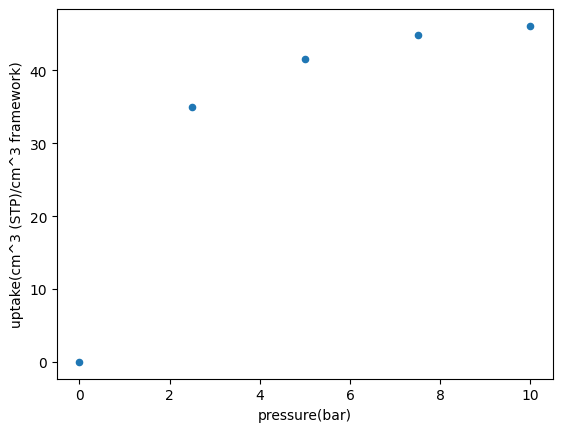

In [52]:
isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',kind='scatter')

# From the CSV files 

> Note : CSV files are created for each isotherms using `output_isotherms_to_csv()` function in `src.convert_data` module

In [56]:
os.listdir('data/isotherms/')

['3e7d78db30fe.csv',
 '0536d5f75759.csv',
 '76fcb6e9276a.csv',
 '8e7bee45b5b6.csv',
 '9fa340233b0f.csv',
 'ddff38353a18.csv',
 'isotherms.csv']

In [60]:
# Read the metadata for each isotherm
df_isotherm = pd.read_csv('data/isotherms/isotherms.csv')
df_isotherm.set_index('isokey',inplace=True)
df_isotherm.head()

,FF,molecule_name,npoints,pressure,simkeys,structure,temperature,unit_cells
isokey,,,,,,,,
9fa340233b0f,GenericMOFs,N2,5.0,10.0,['869a57d7da417c471bb350fea963' 'ddd0c10de958f...,KAXQIL_clean_coremof-2019,298.15,"[5, 3, 2]"
3e7d78db30fe,GenericMOFs,N2,5.0,10.0,['041a36d326f5f5563fbbef50e768' '08b8690169446...,SABWAU01_clean_coremof-2019,298.15,"[2, 2, 4]"
0536d5f75759,GenericMOFs,N2,5.0,10.0,['9c3cd189258978a8ca36479f212f' 'ec99971a5b1dc...,SABWAU_SL_coremof-2019,298.15,"[4, 4, 3]"
8e7bee45b5b6,GenericMOFs,methane,5.0,10.0,['a0e38e9a802a3007aea79964ebf3' '872520a77365c...,KAXQIL_clean_coremof-2019,298.15,"[5, 3, 2]"
76fcb6e9276a,GenericMOFs,methane,5.0,10.0,['19614915f15416a207981c365d11' '62a054f9ae0c9...,SABWAU01_clean_coremof-2019,298.15,"[2, 2, 4]"


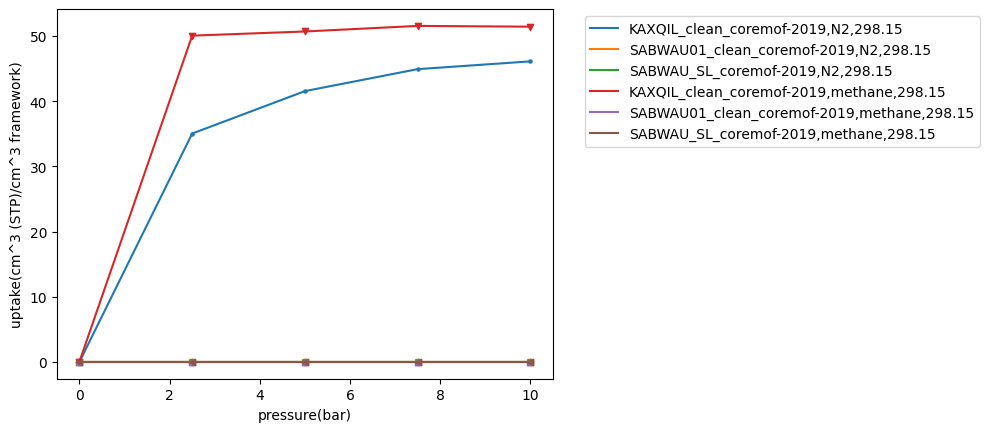

In [122]:
import matplotlib.pyplot as plt
import matplotlib.markers as markers

n_isotherms = df_isotherm.shape[0]
legends = []
cmap = plt.colormaps['tab10']
colors  = [cmap(i) for i in range(n_isotherms)]
markers = list(markers.MarkerStyle.markers)[:n_isotherms]
fig,ax = plt.subplots()
for i,(isokey,data) in enumerate(df_isotherm.iterrows()):
    isotherm = pd.read_csv(f'data/isotherms/{isokey}.csv')
    isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',
                  kind='line',ax= ax,color=colors[i],legend=False)
    isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',
                  kind='scatter',ax= ax,color=colors[i],marker=markers[i])
    legends.append(','.join(map(str,data[['structure','molecule_name','temperature']].values)))
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles,legends,bbox_to_anchor=(1.05, 1), loc='upper left')